In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Data exploration
abalone = pd.read_csv('Downloads/abalone.csv')
abalone.columns=['Sex','Length','Diameter','Height','Whole weight', 'Shucked weight','Viscera weight', 
                 'Shell weight','Rings']
abalone.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
2949,M,0.635,0.515,0.160,1.2075,0.5385,0.2820,0.3450,11
1958,I,0.650,0.520,0.150,1.2380,0.5495,0.2960,0.3305,10
1771,I,0.455,0.325,0.135,0.8200,0.4005,0.1715,0.2110,8
1521,F,0.680,0.500,0.185,1.7410,0.7665,0.3255,0.4685,12
985,M,0.570,0.450,0.155,1.1935,0.5130,0.2100,0.3430,10


In [4]:
abalone.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
abalone.describe()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
abalone[abalone.Height == 0]


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [7]:
abalone = abalone[abalone.Height > 0]
abalone.describe()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


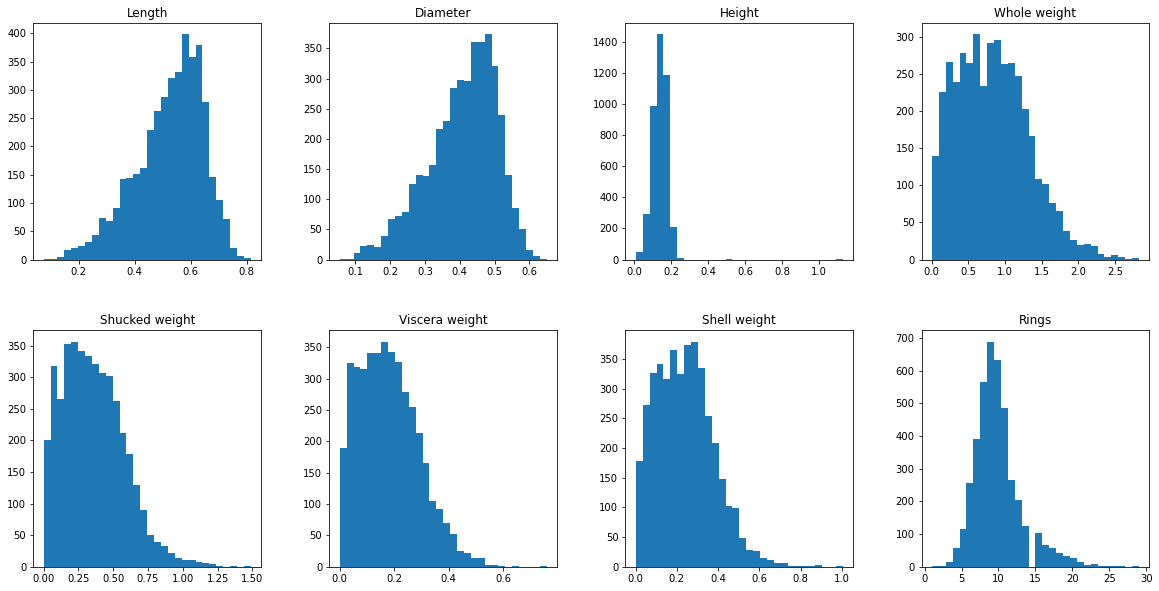

In [8]:
abalone.hist(figsize=(20,10), grid = False, layout=(2,4), bins = 30);

In [9]:
nf = abalone.select_dtypes(include=[np.number]).columns
cf = abalone.select_dtypes(include=[np.object]).columns

In [10]:
skew_list = stats.skew(abalone[nf])
skew_list_df = pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)
skew_list_df.sort_values(by='Skewness', ascending = False)

,Features,Skewness
2,Height,3.165226
7,Rings,1.113354
4,Shucked weight,0.718477
6,Shell weight,0.620857
5,Viscera weight,0.591243
3,Whole weight,0.530358
1,Diameter,-0.609962
0,Length,-0.640763


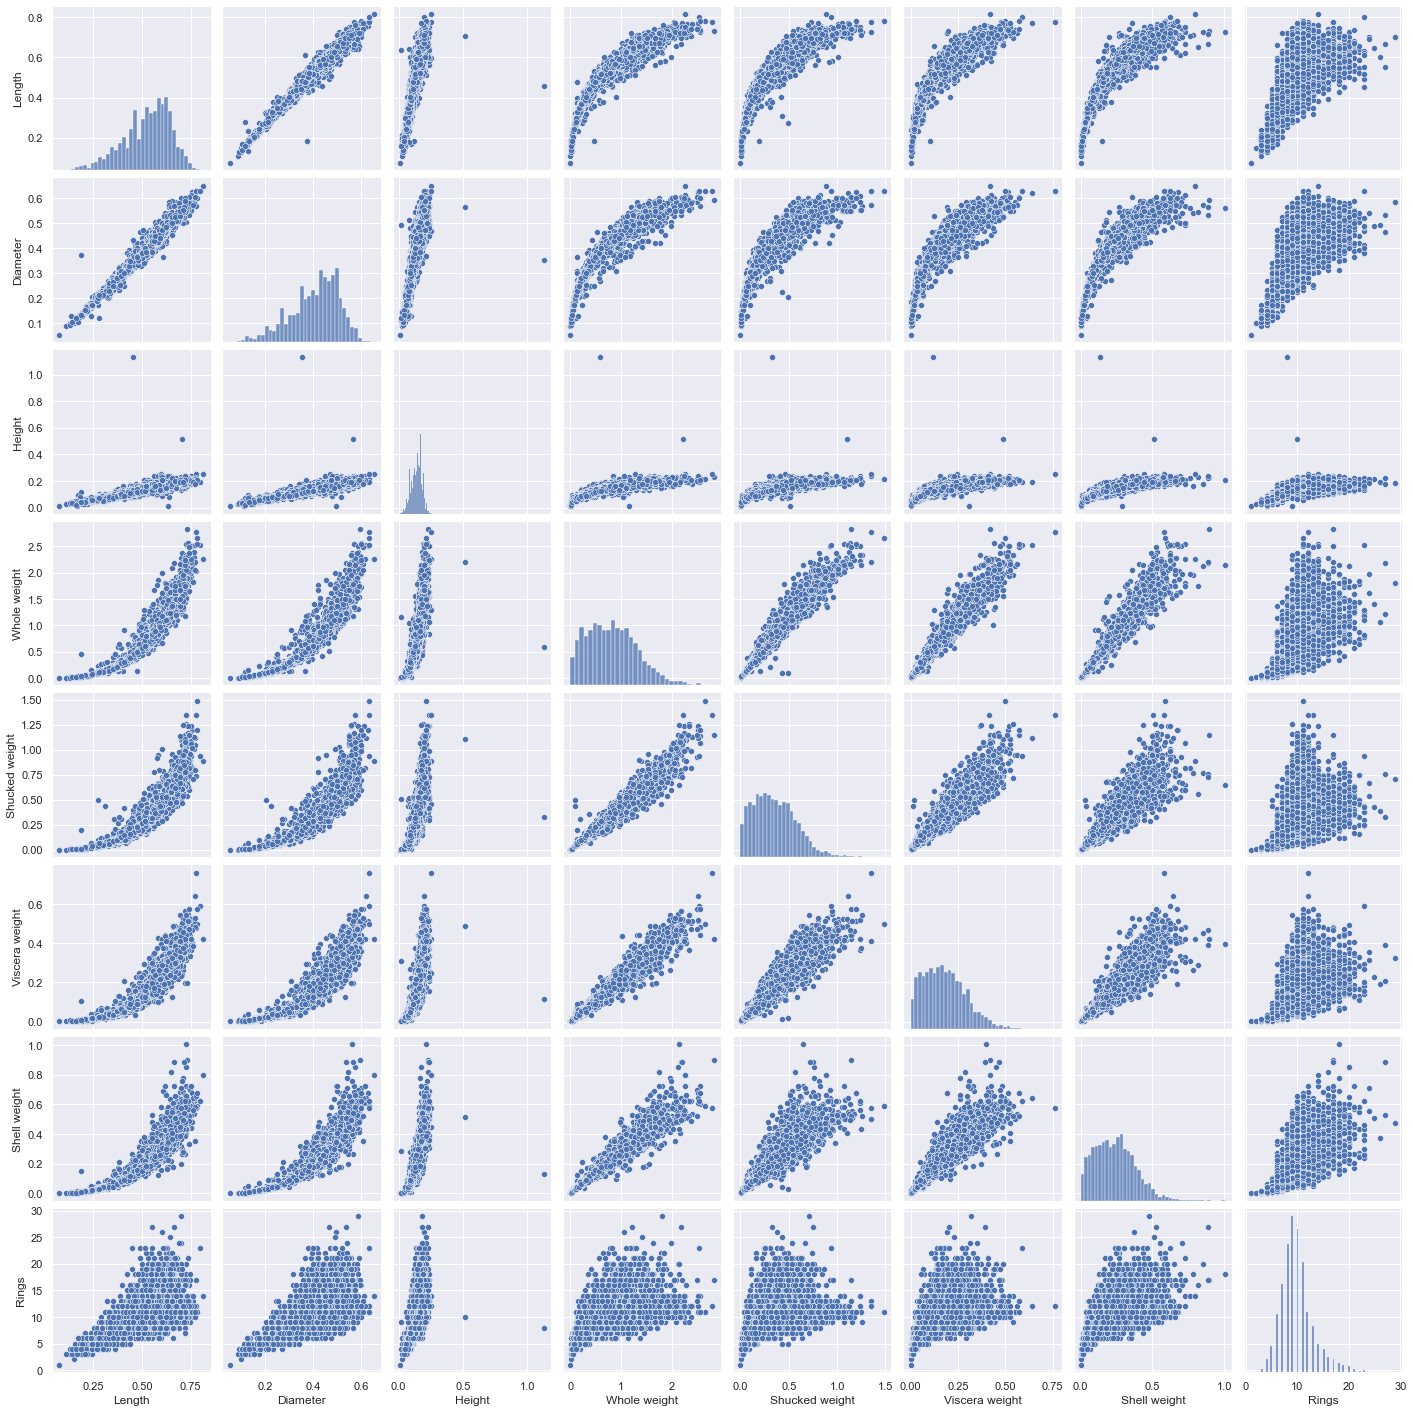

In [11]:
#scatter plots
sns.set()
cols = ['Length','Diameter','Height','Whole weight', 'Shucked weight','Viscera weight', 'Shell weight','Rings']
sns.pairplot(abalone[cols], height = 2.5)
plt.show();

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


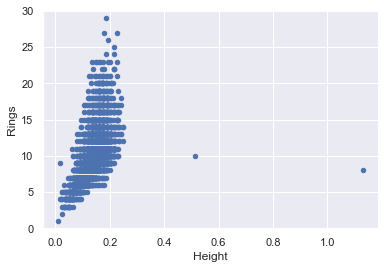

In [12]:
data = pd.concat([abalone['Rings'], abalone['Height']], axis = 1)
data.plot.scatter(x='Height', y='Rings', ylim=(0,30));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


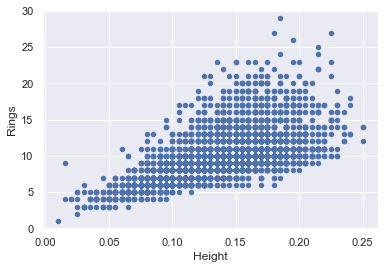

In [13]:
abalone = abalone[abalone.Height < 0.4]
data = pd.concat([abalone['Rings'], abalone['Height']], axis = 1)
data.plot.scatter(x='Height', y='Rings', ylim=(0,30));

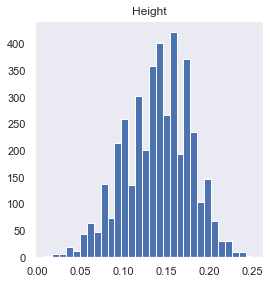

In [14]:
abalone.hist(column = 'Height', figsize=(20,10), grid=False, layout=(2,4), bins = 30);

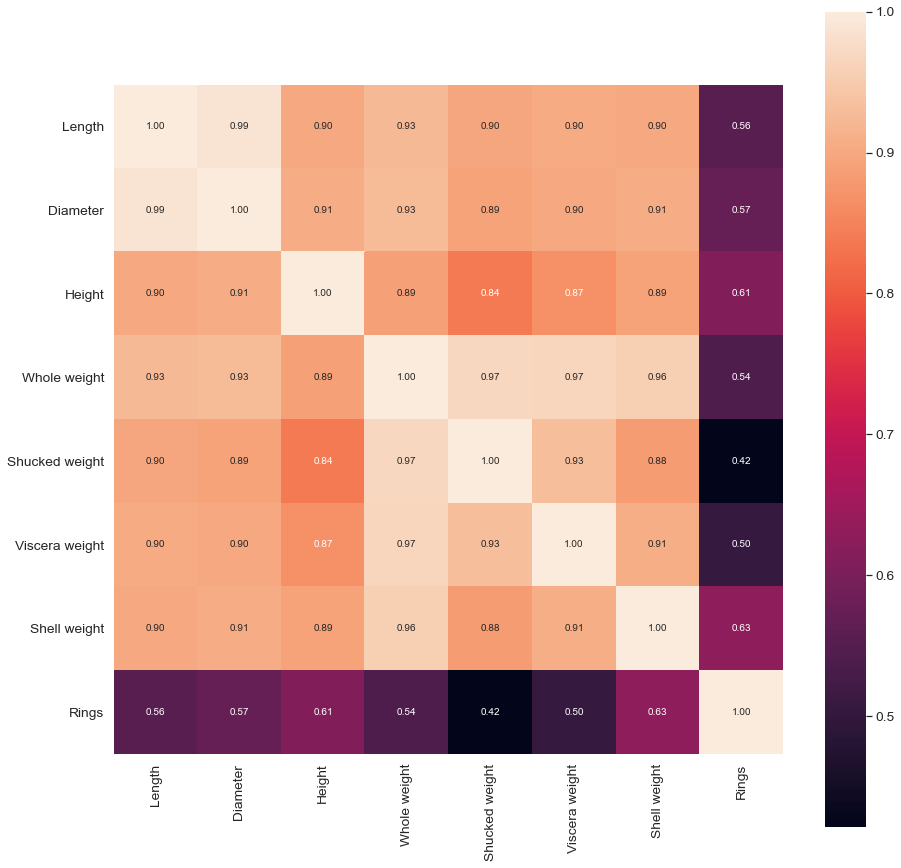

In [15]:
#Correlation matrix
corrmat = abalone.corr()
cols = corrmat.nlargest(8, 'Rings')['Rings'].index
cm = np.corrcoef(abalone[nf].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(15,15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=nf.values, xticklabels=nf.values)
plt.show();

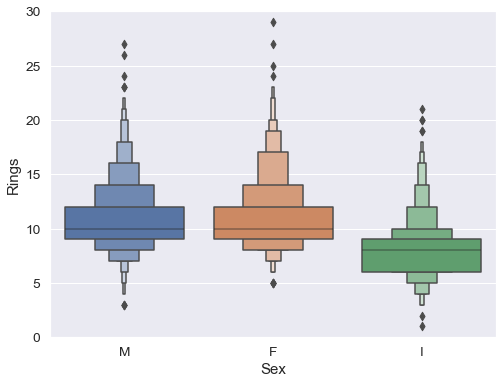

In [16]:
#Categorical Feature
#Finally, I will analyse the relation of Rings with the Sex feature
data = pd.concat([abalone['Rings'], abalone['Sex']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxenplot(x='Sex', y="Rings", data=abalone)
fig.axis(ymin=0, ymax=30);

In [17]:
#Linear Regression Models
#First I will transofrm Sex feature
abalone = pd.get_dummies(abalone)
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [19]:
X = abalone.drop(['Rings'], axis = 1)
y = abalone['Rings']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

In [21]:
#Linear Regression
from sklearn.linear_model import LinearRegression 
paramLin = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
LinearReg = GridSearchCV(LinearRegression(),paramLin, cv = 10)
LinearReg.fit(X = X_train,y= y_train)
LinearRegmodel = LinearReg.best_estimator_
print(LinearReg.best_score_, LinearReg.best_params_)

0.5442592149651514 {'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [22]:
LinearReg.score(X_train,y_train)


0.5495183933715859

In [23]:
LinearReg.score(X_test,y_test)


0.5284622087467308

Text(0, 0.5, 'Predictions')

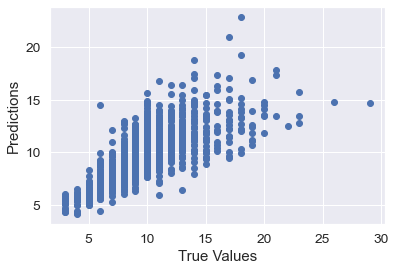

In [24]:
predictions = LinearReg.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [25]:
#Ridge Regression

from sklearn.linear_model import Ridge
paramsRidge = {'alpha':[0.01, 0.1, 1,10,100], 'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

ridgeReg = GridSearchCV(Ridge(),paramsRidge, cv = 10)
ridgeReg.fit(X = X_train,y= y_train)
Rmodel = ridgeReg.best_estimator_
print(ridgeReg.best_score_, ridgeReg.best_params_)

0.5446797209264551 {'alpha': 0.01, 'solver': 'sparse_cg'}


In [26]:
ridgeReg.score(X_train,y_train)


0.5495119485407338

In [27]:
ridgeReg.score(X_test,y_test)


0.5284861316710177

Text(0, 0.5, 'Predictions')

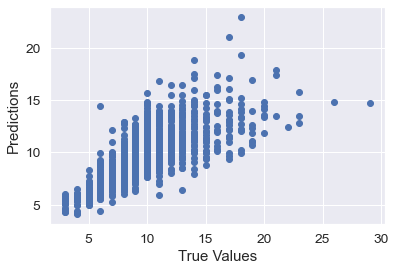

In [28]:
predictions = ridgeReg.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [29]:
#K-means

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [30]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_std)
y_kmeans = kmeans.predict(X_std)

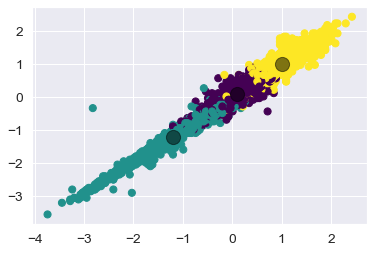

In [31]:
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_kmeans, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [32]:
#PCA
corr_mat = np.corrcoef(X_std.T)



In [33]:
eigenvalues, eigenvectors = np.linalg.eig(corr_mat)
print('\nEigenvalues \n%s' %eigenvalues)


Eigenvalues 
[7.04268735e+00 1.51992435e+00 9.12357383e-01 2.11738613e-01
 1.38564747e-01 9.23677530e-02 6.31893904e-02 1.26148821e-02
 6.55552886e-03 1.65530359e-15]


In [34]:
#eigenvalue and eigenvector pairs
pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
pairs.sort(key = lambda x: x[0], reverse = True)

In [35]:
sorted_eigenval = []
for i in pairs:
    sorted_eigenval.append(i[0])
print(sorted_eigenval)

[7.0426873544585575, 1.5199243483787652, 0.9123573832547275, 0.2117386126091611, 0.13856474695736978, 0.09236775298401334, 0.06318939044878287, 0.012614882050061182, 0.006555528858563172, 1.6553035929113088e-15]


In [36]:
total = sum(eigenvalues)
variance_explained = [(i/total)*100 for i in sorted_eigenval]

In [37]:
variance_explained


[70.42687354458556,
 15.19924348378765,
 9.123573832547272,
 2.1173861260916107,
 1.3856474695736976,
 0.9236775298401332,
 0.6318939044878286,
 0.1261488205006118,
 0.0655552885856317,
 1.6553035929113084e-14]

In [38]:
cum_variance_explained = np.cumsum(variance_explained)
cum_variance_explained

array([ 70.42687354,  85.62611703,  94.74969086,  96.86707699,
        98.25272446,  99.17640199,  99.80829589,  99.93444471,
       100.        , 100.        ])

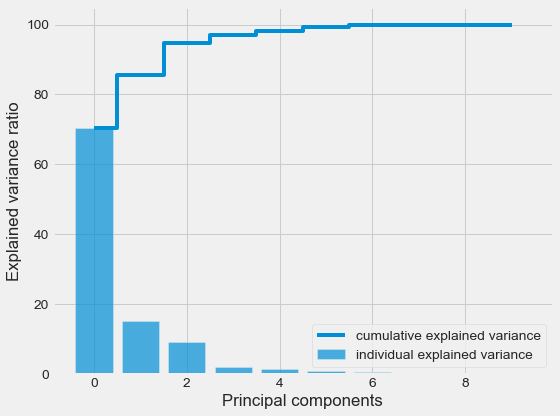

In [39]:
#Plot variance explained by the principal components
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(8, 6))
    plt.bar(range(10), variance_explained, alpha=0.7, align='center',
            label='individual explained variance')
    plt.step(range(10), cum_variance_explained, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout();


In [40]:
projection_mat = np.hstack((pairs[0][1].reshape(10,1),
                           pairs[1][1].reshape(10,1),
                           pairs[2][1].reshape(10,1)))


In [41]:
X_new = X_std.dot(projection_mat)
X_new.shape

(4173, 3)

In [42]:
#Classification
abalone.head(5)


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [43]:
bins = [0,8,10,abalone['Rings'].max()]
group_names = ['young','medium','old']
abalone['Rings'] = pd.cut(abalone['Rings'],bins, labels = group_names)

In [44]:
dictionary = {'young':0, 'medium':1, 'old':2}
abalone['Rings'] = abalone['Rings'].map(dictionary)

In [45]:
abalone.head(10)


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,2,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,0,1,0
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,0,0,1,0
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,2,1,0,0
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,2,1,0,0
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,1,0,0,1
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,2,1,0,0


In [46]:
X = abalone.drop(['Rings'], axis = 1)
y = abalone['Rings']

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [48]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
paramsKn = {'n_neighbors':range(1,30)}
Kneighbours = GridSearchCV(KNeighborsClassifier(),paramsKn, cv=10)

Kneighbours.fit(X=X_train,y=y_train)
Kmodel = Kneighbours.best_estimator_
print(Kneighbours.best_score_, Kneighbours.best_params_)


0.6444003884123645 {'n_neighbors': 15}


In [50]:
#SVM
from sklearn.svm import SVC
paramsSvm = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                  'C':[0.1,1,10],'gamma':[0.01,0.1,0.5,1,2]}

Svm = GridSearchCV(SVC(),paramsSvm,cv=5)

Svm.fit(X_train,y_train)
model_svm = Svm.best_estimator_
print(Svm.best_score_,Svm.best_params_)

0.666565370009606 {'C': 10, 'gamma': 2, 'kernel': 'poly'}
